<h1 style='background:#33ddff; color:Black'><center><br>  Identify Customer Segments For Online Retail With The Use Of K-Means Clustering  </Left></br></center></h1>

***

<h1 style='background:#e3e3e1; color:Black'><Left><br>  01. Introduction </br></Left></h1>

_The aim of this project is to Identify Customer Segmentation on a dataset of online retail e-commerce company with the use of K-Means Clustering, which is an Unsupervised Machine Learning algorithm. Using K-Means Clustering algorithms, we will get a certain number of clusters like 2, 3, 4 or more, where each cluster will denote a type of customer category in the business of online retail._

### **1.1** : Disabling Python Warnings

In [6]:
#Ignore Python Warnings
import warnings as war
war.filterwarnings('ignore')

### **1.2** : Importing Libraries 

In [8]:
# Importing all the required libraries for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

### **1.3** : Importing required Dataset for EDA

In [10]:
#Reading required Dataset from excel file and storing its contains into 'online_df' DataFrame & then checking its head()

online_df = pd.read_excel("Dataset\Online Retail.xlsx")
online_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

### **1.4** : Checking Various Stats of our dataset

In [12]:
# Checking Shape of our Dataset
online_df.shape

(541909, 8)

>**Insight,**
>- **_We can see, there are more than 541K Rows and 8 Columns in our Dataset._**

In [14]:
# Checking information about the Dataset and its Datatype.
online_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


> **Insight,**
>- _**Looking at the data, we can say their are 2 columns with the missing values, for which data cleaning is required before analysis.**_

In [16]:
# Now, lets check the Descriptive statistical summary of all the columns in our dataset. 
online_df.describe(include='all')

InvoiceNo StockCode                         Description  \
count    541909.0    541909                              540455   
unique    25900.0      4070                                4223   
top      573585.0    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq       1114.0      2313                                2369   
mean          NaN       NaN                                 NaN   
min           NaN       NaN                                 NaN   
25%           NaN       NaN                                 NaN   
50%           NaN       NaN                                 NaN   
75%           NaN       NaN                                 NaN   
max           NaN       NaN                                 NaN   
std           NaN       NaN                                 NaN   

             Quantity                    InvoiceDate      UnitPrice  \
count   541909.000000                         541909  541909.000000   
unique            NaN                            NaN            NaN   
top               NaN                            NaN            NaN   
freq              NaN                            NaN            NaN   
mean         9.552250  2011-07-04 13:34:57.156386048       4.611114   
min     -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%          1.000000            2011-03-28 11:34:00       1.250000   
50%          3.000000            2011-07-19 17:17:00       2.080000   
75%         10.000000            2011-10-19 11:27:00       4.130000   
max      80995.000000            2011-12-09 12:50:00   38970.000000   
std        218.081158                            NaN      96.759853   

           CustomerID         Country  
count   406829.000000          541909  
unique            NaN              38  
top               NaN  United Kingdom  
freq              NaN          495478  
mean     15287.690570             NaN  
min      12346.000000             NaN  
25%      13953.000000             NaN  
50%      15152.000000             NaN  
75%      16791.000000             NaN  
max      18287.000000             NaN  
std       1713.600303             NaN

> **Insight,** 
>- _**As per statistical summary, we can see their are negative values in Quantity and UnitPrice.**_

***

<h1 style='background:#e3e3e1; color:Black'><Left><br>  02. Data Cleaning and Pre-processing </br></Left></h1>


### **2.1** : Removing case mis-match

_Creating user function to convert alphabetic characters to uppercase_

In [20]:
# Creating Function to convert alphabetic characters to uppercase
def to_uppercase_alpha(val):
    if isinstance(val, str):
        return ''.join([char.upper() if char.isalpha() else char for char in val])
    return val

In [21]:
# Removing case mis-match by Standardizing all the values of string type to Uppercase() using the Function Created.

online_df = online_df.map(lambda x: to_uppercase_alpha(x) if isinstance(x, str) else x)

### **2.2** : Assigning Correct Datatype
__Changing Datatype of `InvoiceDate` to 'Datetime' Datatype and `CustomerID` to 'Object' Datatype.__

In [23]:
# Changing Datatype of InvoiceDate to Datetime Datatype 
online_df['InvoiceDate'] = pd.to_datetime(online_df['InvoiceDate'])

In [24]:
# Changing datatype of CustomerID from 'float64' to 'object'
online_df['CustomerID'] = online_df['CustomerID'].astype(object)

In [25]:
# Checking changes in Dataset
online_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


### **2.3** : Checking for Duplicates Rows Entires and Removing them 

In [27]:
# Checking for Duplicate Entires in our Dataset
online_df.duplicated().sum()

5268

In [28]:
# Removing Duplicates and checking shape change
online_df.drop_duplicates(inplace=True)
print(online_df.shape)

(536641, 8)


### **2.4** : Checking for Missing Values in our Dataset

In [30]:
# Let's Checking null values in the Dataset
online_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [31]:
# Checking percentage of null values
online_df.isna().sum()/len(online_df)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64

> **Insight,**
>- _We can see, There are 2 cloumns having Missing Values_
>- _**`CustomerID`** cloumn has around **25.16%** missing values i.e. ~135K null values_
>- _**`Description`** column has around **0.27%** missing values i.e. 1454 null values_

### **2.5** : Treating Missing Values

To deal with missing values in **`CustomerID`**, which has around **25.16%** of null data, 
**We can Drop all the rows with missing `CustomerID`**.

_**This decision was made because the aim of this project is to find customer segments by exploring data at customer level, therefore all observations that are not assigned to a particular customer cannot be used for analysis.**_

In [35]:
# Droping all rows that has null in `CustomerID` 
online_df.dropna(axis=0 , subset=['CustomerID'] , inplace=True)

In [36]:
# Now, let's check the changes and remaining null values in our Dataset
online_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [37]:
# Checking Shape change of our Dataset
online_df.shape

(401604, 8)

>**Insight,**
>- **_By droping the null values of **`CustomerID`** column, we can see that null values of **`Description`** column also gets removed._**
>- **_Thus, now we don't have any missing values in our dataset._**

***

<h1 style='background:#e3e3e1; color:Black'><Left><br>  03. Feature Engineering </br></Left></h1>

### **3.1** : _Creating new variable **`Order_Amount`**_

In [42]:
# Creating new variable 'Order_Amount' = Quantity * UnitPrice for each order

online_df['Order_Amount'] = online_df['Quantity'] * online_df['UnitPrice']
online_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  Order_Amount  
0 2010-12-01 08:26:00       2.55    17850.0  UNITED KINGDOM         15.30  
1 2010-12-01 08:26:00       3.39    17850.0  UNITED KINGDOM         20.34  
2 2010-12-01 08:26:00       2.75    17850.0  UNITED KINGDOM         22.00  
3 2010-12-01 08:26:00       3.39    17850.0  UNITED KINGDOM         20.34  
4 2010-12-01 08:26:00       3.39    17850.0  UNITED KINGDOM         20.34

### **3.2** : _Creating new variable **`Is_Cancelled`**_
_As per the data dictionary, **`InvoiceNo`** starting with a **'C'** are the cancelled orders._

**_Thus, creating new feature variable **`Is_Cancelled`**, having value **'0'** if the order is **Not Cancelled** and value **'1'** if the order is **Cancelled**._**

In [44]:
online_df['Is_Cancelled'] = online_df['InvoiceNo'].apply(lambda x: 1 if isinstance(x, str) and x.startswith('C') else 0)
online_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  Order_Amount  \
0 2010-12-01 08:26:00       2.55    17850.0  UNITED KINGDOM         15.30   
1 2010-12-01 08:26:00       3.39    17850.0  UNITED KINGDOM         20.34   
2 2010-12-01 08:26:00       2.75    17850.0  UNITED KINGDOM         22.00   
3 2010-12-01 08:26:00       3.39    17850.0  UNITED KINGDOM         20.34   
4 2010-12-01 08:26:00       3.39    17850.0  UNITED KINGDOM         20.34   

   Is_Cancelled  
0             0  
1             0  
2             0  
3             0  
4             0

In [45]:
# Lets check the value count of Cancelled Orders
online_df['Is_Cancelled'].value_counts()

Is_Cancelled
0    392732
1      8872
Name: count, dtype: int64

In [46]:
# Checking percentage of Cancelled Orders
online_df['Is_Cancelled'].value_counts()/len(online_df)*100

Is_Cancelled
0    97.790859
1     2.209141
Name: count, dtype: float64

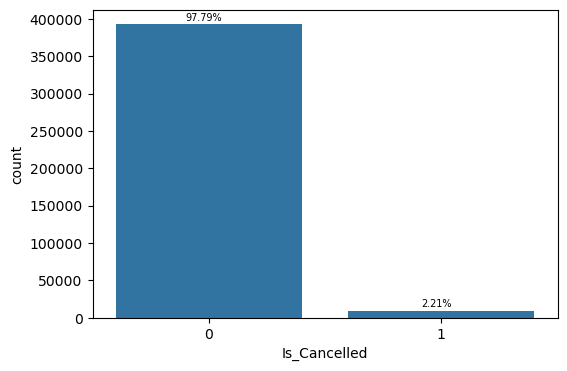

In [47]:
# Lets visualize the Cancelled order percentage
plt.figure(figsize=[6,4])
ax = sns.countplot(x=online_df['Is_Cancelled'],  legend='auto')
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(online_df))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=7, color='black', xytext=(5,5),
               textcoords='offset points')
plt.show()

>**Insight,**
>- **_Their are only 2.21% of Cancelled Orders (i.e. 8872)_**
>- **_And rest 97.79% Orders are not cancelled (i.e. 392732)_**

### **3.3** : Creating new Dataframe as **`Customer_Profile`** by grouping all the data by **`CustomerID`**

**_Now, let's start creating **`Customer_Profile`** by grouping data by **`CustomerID`**. This will make it easier to explore customers characteristics._**

In [51]:
# Firstly lets create an empty Dataframe as 'Customer_Profile'
Customer_Profile = pd.DataFrame()

#### **3.3.1** : _Calculating Total number of Orders per Customer i.e. **`Frequency`** which is defined as how frequent is the customer in ordering/buying some product._

In [53]:
# Calculating Total number of Orders per Customer i.e. `Frequency` and storing in Dataframe `Customer_Profile`
Customer_Profile['Frequency'] = online_df.groupby(by='CustomerID')['InvoiceNo'].count()
Customer_Profile['Frequency'].head()

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: Frequency, dtype: int64

#### **3.3.2** : _Calculating the total order value per customer i.e. **`Monetary`** which is defined as how much does the customer spend on purchasing the products._

In [55]:
# Calculating the Total Spending or order value per customer i.e. `Monetary` and storing in Dataframe `Customer_Profile`
Customer_Profile['Monetary'] = online_df.groupby(by='CustomerID')['Order_Amount'].sum()
Customer_Profile['Monetary'].head()

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: Monetary, dtype: float64

#### **3.3.3** : _Calculating the total item quantity ordered by each customer i.e. **`Quantity_per_Customer`**_

In [57]:
# Calculating the total item quantity ordered per customer
Customer_Profile['Quantity_per_Customer'] = online_df.groupby(by='CustomerID')['Quantity'].sum()
Customer_Profile['Quantity_per_Customer'].head()

CustomerID
12346.0       0
12347.0    2458
12348.0    2341
12349.0     631
12350.0     197
Name: Quantity_per_Customer, dtype: int64

#### **3.3.4** : _Now, calculating the **`Average_Item_Price`** of all the items ordered by each customer, to see if the customer buys expensive items or not_

In [59]:
# Calculating the Average Unitprice per customer, to see if the customer buys expensive items or not
Customer_Profile['Avg_Item_Price'] = online_df.groupby(by='CustomerID')['UnitPrice'].mean()
Customer_Profile['Avg_Item_Price'].head()

CustomerID
12346.0    1.040000
12347.0    2.644011
12348.0    5.764839
12349.0    8.289041
12350.0    3.841176
Name: Avg_Item_Price, dtype: float64

#### **3.3.5** : _Calculating Total Cancelled Orders by each customer i.e. **`Order_Cancellations`**_

In [61]:
# Calculating Total Cancelled orders by each customer
Customer_Profile['Order_Cancellations'] = online_df.groupby(by='CustomerID')['Is_Cancelled'].sum()
Customer_Profile['Order_Cancellations'].head()

CustomerID
12346.0    1
12347.0    0
12348.0    0
12349.0    0
12350.0    0
Name: Order_Cancellations, dtype: int64

#### **3.3.6** : _Now, Let's add **`Country`** of each customer in our `Customer_Profile` Dataframe_

In [63]:
# Adding `Country` of each customer
Customer_Profile['Country'] = online_df.groupby(by='CustomerID')['Country'].first()
Customer_Profile['Country'].value_counts()

Country
UNITED KINGDOM          3950
GERMANY                   95
FRANCE                    87
SPAIN                     29
BELGIUM                   24
SWITZERLAND               20
PORTUGAL                  19
ITALY                     15
FINLAND                   12
NORWAY                    10
NETHERLANDS                9
AUSTRIA                    9
CHANNEL ISLANDS            9
AUSTRALIA                  9
SWEDEN                     8
JAPAN                      8
DENMARK                    8
CYPRUS                     7
POLAND                     6
USA                        4
CANADA                     4
GREECE                     4
ISRAEL                     4
UNSPECIFIED                4
EIRE                       3
UNITED ARAB EMIRATES       2
BAHRAIN                    2
MALTA                      2
SAUDI ARABIA               1
SINGAPORE                  1
ICELAND                    1
RSA                        1
LEBANON                    1
BRAZIL                     1
CZECH 

In [64]:
# Let's Check how many Unique Countries are present in our dataset
Customer_Profile['Country'].nunique()

37

>**Insight,**
>- **_As we can see there are total __37 Countries__ from where Customers are placing Orders._**
>- **_From the values count, we can clearly see __Maximum Orders__ are comming from **UNITED KINGDOM** around __3950__ i.e. almost 90.35% of total orders._**

#### **3.3.7** : Now, to clearly understand the Customer Location, let's check from which **`Continent`** orders are been placed

In [67]:
# let's create a Dictionary for mapping countries to their respective continents
country_to_continent = {
    'UNITED KINGDOM': 'Europe', 'GERMANY': 'Europe', 'FRANCE': 'Europe', 'SPAIN': 'Europe', 'BELGIUM': 'Europe', 'SWITZERLAND': 'Europe', 
    'PORTUGAL': 'Europe', 'ITALY': 'Europe', 'FINLAND': 'Europe', 'NORWAY': 'Europe', 'NETHERLANDS': 'Europe', 'AUSTRIA': 'Europe', 
    'CHANNEL ISLANDS': 'Europe', 'AUSTRALIA': 'Oceania', 'SWEDEN': 'Europe', 'JAPAN': 'Asia', 'DENMARK': 'Europe', 'CYPRUS': 'Asia', 
    'POLAND': 'Europe', 'USA': 'North America', 'CANADA': 'North America', 'GREECE': 'Europe', 'ISRAEL': 'Asia', 'EIRE': 'Europe', 
    'UNITED ARAB EMIRATES': 'Asia', 'BAHRAIN': 'Asia', 'MALTA': 'Europe', 'SAUDI ARABIA': 'Asia', 'SINGAPORE': 'Asia', 'ICELAND': 'Europe', 
    'RSA': 'Africa', 'LEBANON': 'Asia', 'BRAZIL': 'South America', 'CZECH REPUBLIC': 'Europe', 'EUROPEAN COMMUNITY': 'Europe', 
    'LITHUANIA': 'Europe', 'UNSPECIFIED': 'Unknown'}

In [68]:
# Now, creating new Column 'Continent' based on the 'Country' column 
Customer_Profile['Continent'] = Customer_Profile['Country'].map(country_to_continent)

In [69]:
# Let's check the Percentage of Orders placed from different Continents
Customer_Profile['Continent'].value_counts()/len(Customer_Profile)*100

Continent
Europe           98.879231
Asia              0.594694
Oceania           0.205855
North America     0.182983
Unknown           0.091491
Africa            0.022873
South America     0.022873
Name: count, dtype: float64

>**Insight,**
>- **_Now we can clearly see, Maximum Orders are been placed from **Europe Continent** which is around 98.88% of Total Orders._**
>- **_And **UNITED KINGDOM** is the top Country placing around 90.35% of total orders._**
>- **_Hence, we can conclude that **`Country`** and **`Continent`** Columns are highly biased and will not be useful in our analysis._**
### _Thus, Lets drop both these columns to avoid any bias in our data._

In [315]:
# Droping Country and Continent column from our Dataset
Customer_Profile.drop(['Country', 'Continent'], axis=1 , inplace=True)

#### **3.3.8** : _Now, Let's create a new dataframe **`customer_order_span`** with column **`Days_As_Customer`** by taking the difference in days between the date of a customer's last order, and the date of their first order._

In [73]:
# Calculating the number of `Days as Customer`
customer_order_span = online_df.groupby(by='CustomerID')['InvoiceDate'].agg(['min','max'])

customer_order_span['Days_As_Customer'] = (customer_order_span['max'] - customer_order_span['min']).dt.days
customer_order_span.head()

min                 max  Days_As_Customer
CustomerID                                                          
12346.0    2011-01-18 10:01:00 2011-01-18 10:17:00                 0
12347.0    2010-12-07 14:57:00 2011-12-07 15:52:00               365
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0

#### **3.3.9** : _Now, Calculating the number of Days from customer's last order i.e. **`Recency`** which is defined as How recently has the customer made a transaction or ordered any product._

In [75]:
# from Descriptive stats we can see the Max 'InvoiceDate' is 2011-12-09 12:50:00,
# Thus, lets set the `Present_date` values as '2011-12-12'
Present_date = datetime(2011,12,12)
print(Present_date)

2011-12-12 00:00:00


In [76]:
# Now, calculating `Recency` by taking the difference in days between the set `Present_date` and the date of customer's last order.
customer_order_span['Recency'] = (Present_date - customer_order_span['max']).dt.days
customer_order_span.head()

min                 max  Days_As_Customer  Recency
CustomerID                                                                   
12346.0    2011-01-18 10:01:00 2011-01-18 10:17:00                 0      327
12347.0    2010-12-07 14:57:00 2011-12-07 15:52:00               365        4
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282       77
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0       20
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0      312

##### Now, Droping column **`min`** and **`max`** from **`customer_order_span`** as its not required further.

In [78]:
# Droping column `min` and `max` from `customer_order_span` as its not required further.
customer_order_span.drop(['min','max'], axis=1 , inplace=True)

# Checking head of 'customer_order_span'
customer_order_span.head()

Days_As_Customer  Recency
CustomerID                           
12346.0                    0      327
12347.0                  365        4
12348.0                  282       77
12349.0                    0       20
12350.0                    0      312

#### **3.3.10** : _Now, Let's Merge **`customer_order_span`** to **`Customer_Profile`** Dataframe_

In [80]:
Customer_Profile = pd.merge(Customer_Profile , customer_order_span, on='CustomerID')
Customer_Profile.head()

Frequency  Monetary  Quantity_per_Customer  Avg_Item_Price  \
CustomerID                                                               
12346.0             2      0.00                      0        1.040000   
12347.0           182   4310.00                   2458        2.644011   
12348.0            31   1797.24                   2341        5.764839   
12349.0            73   1757.55                    631        8.289041   
12350.0            17    334.40                    197        3.841176   

            Order_Cancellations         Country Continent  Days_As_Customer  \
CustomerID                                                                    
12346.0                       1  UNITED KINGDOM    Europe                 0   
12347.0                       0         ICELAND    Europe               365   
12348.0                       0         FINLAND    Europe               282   
12349.0                       0           ITALY    Europe                 0   
12350.0                       0          NORWAY    Europe                 0   

            Recency  
CustomerID           
12346.0         327  
12347.0           4  
12348.0          77  
12349.0          20  
12350.0         312

In [81]:
# Checking Shape of `Customer_Profile`
Customer_Profile.shape

(4372, 9)

>**Insight,**
>After merging, Our final **`Customer_Profile`** dataset contains the following variables:
>- **`CustomrID`** : Customer unique identierfier (_used are Row Index_)
>- **`Frequency`** : Total number Orders made by each customer. 
>- **`Monetary`** : Total amount or Order value spend by each customer.
>- **`Quantity_per_Customer`** : Total Quantity of orders placed by each customer.
>- **`Avg_Item_Price`** : Average price of items purchased by the customer.
>- **`Order_Cancellations`** : Total number of orders cancelled by each customer. 
>- **`Days_As_Customer`** : Total number of days between first and last order placed by the customer
>- **`Recency`** : Number of days since customer’s last order.

In [83]:
# Exporting the Customer Profile Dataset into CSV file
#Customer_Profile.to_csv("Customer_Profile.csv")
#print('Exported')

***

<h1 style='background:#e3e3e1; color:Black'><Left><br>  04. Data Analysis and Visualization </br></Left></h1>

### **4.1** : _Firstly, Let's sepreate all the Numerical and Categorical variables_

In [319]:
# Storing all the Numerical Column names into `num_var` variables 
num_var = Customer_Profile.select_dtypes(include='number').columns
print(num_var)

# Similarly, storing all the Categorical Column names into `cat_var` variables, if any.
cat_var = Customer_Profile.select_dtypes(include='object').columns
print(cat_var)

Index(['CustomerID', 'Frequency', 'Monetary', 'Quantity_per_Customer',
       'Avg_Item_Price', 'Order_Cancellations', 'Days_As_Customer', 'Recency',
       'Pred_cluster'],
      dtype='object')
Index([], dtype='object')


### **4.2** Now, let's Visualize the Distribution of data across all **_`Numerical Variables`_**

_Boxplot and Histogram are very useful charts to check for any Outliers in our data and to see the distribution of data, respectively. To make it easy for analysis, let's create a new Function._

In [90]:
# Creating a function for ploting Boxplot and Histogram Graph for Outlier analysis

def plot_box_histogram(column_name):
    plt.figure(figsize=[12,3])
    plt.subplot(1,2,1)
    sns.boxplot(x=column_name)
    plt.title(f"Boxplot of '{column_name.name}' ")

    plt.subplot(1,2,2)
    sns.histplot(x=column_name, kde=True)
    plt.title(f"Distribution of '{column_name.name}' ")
    plt.axvline(column_name.mean(), color='r', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(column_name.median(), color='g', linestyle='dashed', linewidth=1, label='Median')
    plt.legend()

    plt.show()
    print(f'\n')


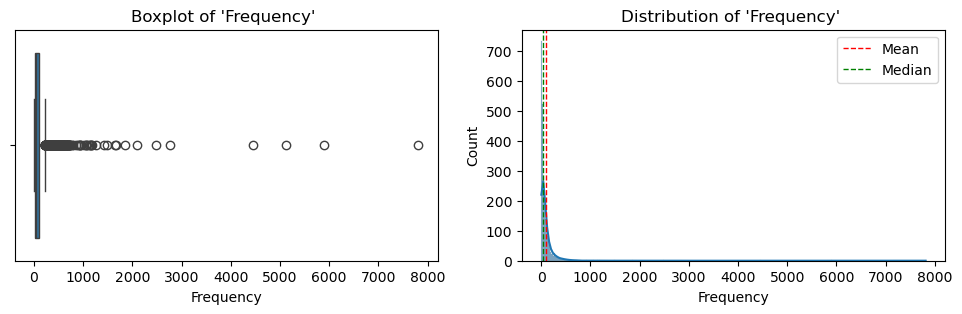

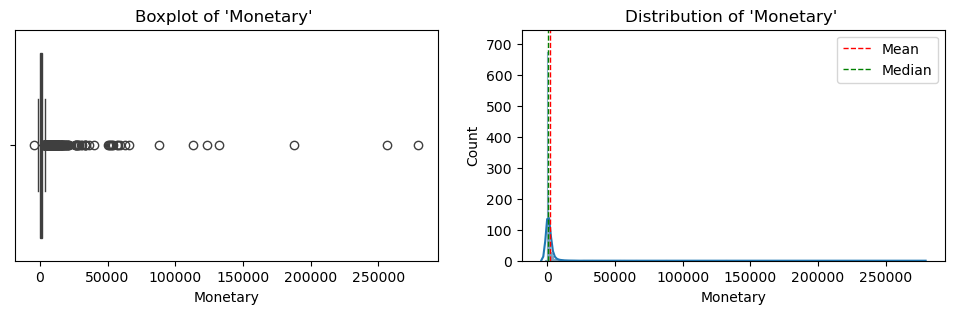

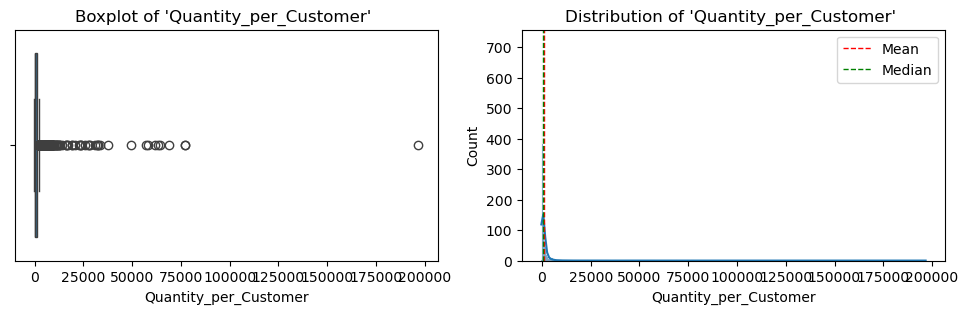

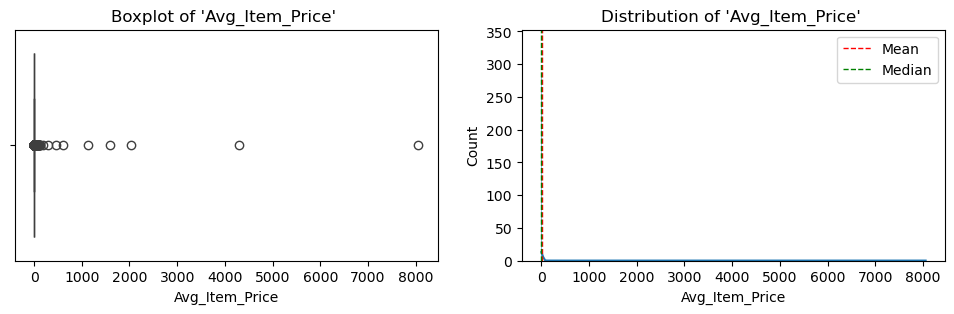

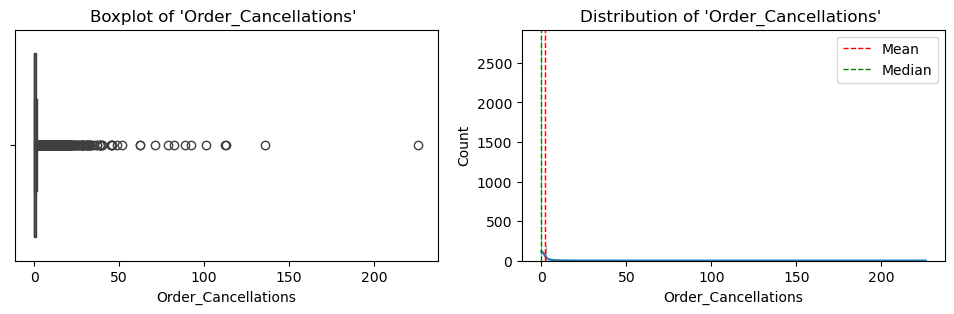

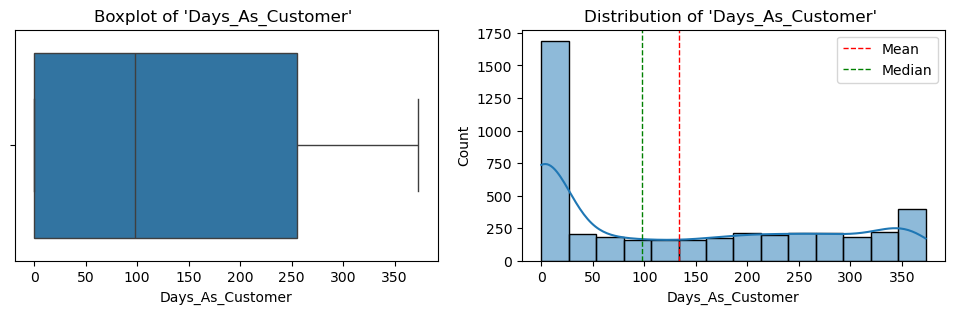

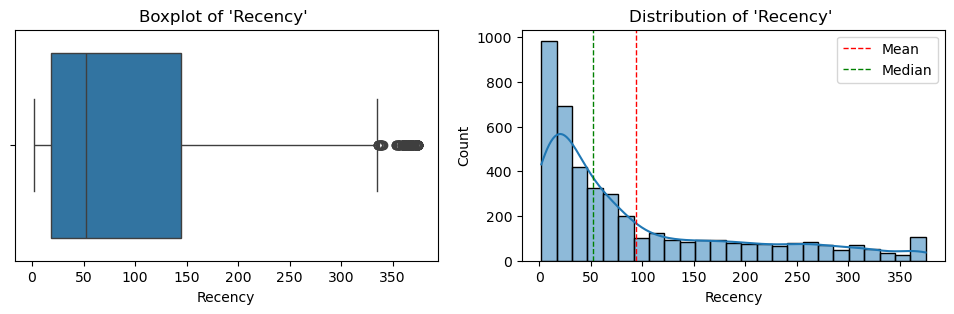

In [91]:
# Now lets Visualize the distribution of Data across all numerical Columns
for col in num_var:
    plot_box_histogram(Customer_Profile[col])

>**Insight,**
>- **_From all the above, Boxplot and Histogram charts, we can see there are lots of Outliers in many numerical columns._**
>- **_To get the Accurate analysis and customer segments we need to treat these Outliers before applying K-Means algorithm._**

### **4.3** Now, Let's visualize Quantile plot of all numerical variables, for better understanding of Outliers.

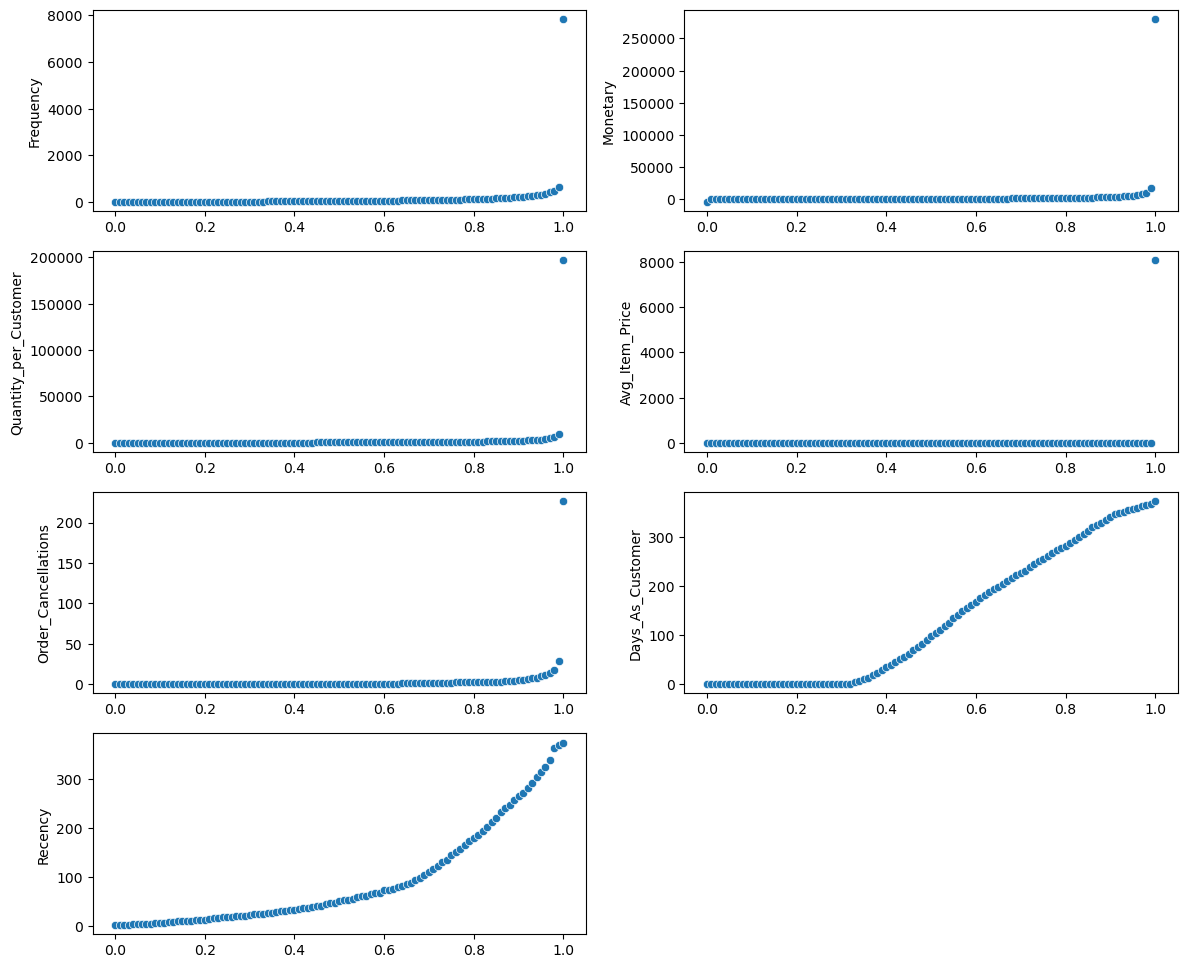

In [94]:
# Creating scatterplot of percentile, to check for outliers in all numerical columns.

i = 1
plt.figure(figsize=[14,12])
for col in num_var: 
    plt.subplot(4,2,i)
    sns.scatterplot(Customer_Profile[col].quantile( np.arange(0, 1.01, 0.01) ))
    i = i+1
plt.show()


**Insight,**





***

<h1 style='background:#e3e3e1; color:Black'><Left><br>  05. Handling Outliers in numerical columns </br></Left></h1>

_Outliers are extreme values that deviate from the normal range of values in a dataset. Outliers can distort the results of data analysis, and should be identified and treated accordingly. Their are many techniques to handle outliers in the dataset._

_One of the common technique to treat outliers is by using statistical methods like **IQR (Interquartile Range)**_

_So, lets create a new function to calculate **IQR (Interquartile Range)** for easy calculation._

In [99]:
#Creating a function to calculate IQR (Inter Quartile range) along with IQR Upper and Lower limit, of any column

def IQR_Limits(column_name):
    IQR_Q1 = column_name.quantile(0.25)
    IQE_Q3 = column_name.quantile(0.75)
    IQR_value = IQE_Q3 - IQR_Q1

    IQR_lower_limit = IQR_Q1 - 1.5*IQR_value
    IQR_upper_limit = IQE_Q3 + 1.5*IQR_value

    return print(f"IQR Value is: {IQR_value} \nIQR Lower Limit is: {IQR_lower_limit} \nIQR Upper Limit is: {IQR_upper_limit}")

### **5.1** : Outlier Analysis of **`Frequency`** column 
Frequency : Total number Orders made by each customer

In [101]:
# Checking IRQ limits of 'Frequency' using function.
IQR_Limits(Customer_Profile['Frequency'])

IQR Value is: 82.25 
IQR Lower Limit is: -106.375 
IQR Upper Limit is: 222.625


In [102]:
# Now, Capping all the Outliers values in `Frequency` Column to the IQR Upper Limit
Customer_Profile.loc[Customer_Profile['Frequency']> 222.625 , ['Frequency'] ] = 222.625

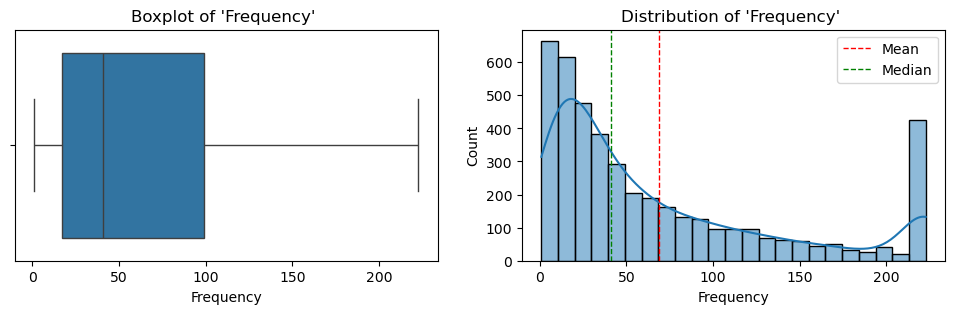

In [103]:
# Let's visualize the change in distribution of 'Frequency'
plot_box_histogram(Customer_Profile['Frequency'])

### **5.2** : Outlier Analysis of **`Monetary`** column
_Monetary : Total amount or Order value spend by each customer i.e. Total Spending_

In [105]:
# Checking IRQ limits of 'Monetary' using function.
IQR_Limits(Customer_Profile['Monetary'])

IQR Value is: 1316.54 
IQR Lower Limit is: -1683.0149999999999 
IQR Upper Limit is: 3583.145


In [106]:
# Now, Capping all the highest values to the IQR Upper Limit
Customer_Profile.loc[Customer_Profile['Monetary']> 3583.145 , ['Monetary'] ] = 3583.145

In [107]:
# Now, Flooring all the negative values to 0, as it indicate Order Returns & Cancellation, which is already been captured by `Order_Cancellations` column.
Customer_Profile.loc[Customer_Profile['Monetary'] < 0 , ['Monetary'] ] = 0

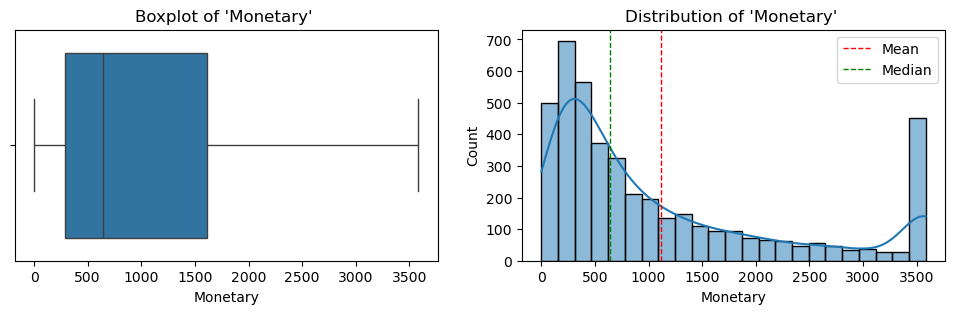

In [108]:
# Let's visualize the change in dustribution of 'Total_Spending'
plot_box_histogram(Customer_Profile['Monetary'])

### **5.3** : Analysis of **`Quantity_per_Customer`** column
_Quantity_per_Customer : Total Quantity of orders placed by each customer_

In [110]:
# Checking IRQ limits of 'Quantity_per_Customer' using function.
IQR_Limits(Customer_Profile['Quantity_per_Customer'])

IQR Value is: 804.5 
IQR Lower Limit is: -1055.0 
IQR Upper Limit is: 2163.0


In [111]:
# Now, Capping all the highest values to the IQR Upper Limit
Customer_Profile.loc[Customer_Profile['Quantity_per_Customer']> 2163.0 , ['Quantity_per_Customer'] ] = 2163.0

In [112]:
# Now, Flooring all the negative values to 0, as it indicate Order Returns & Cancellation, which is already been captured by `Order_Cancellations` column.
Customer_Profile.loc[Customer_Profile['Quantity_per_Customer'] < 0 , ['Quantity_per_Customer'] ] = 0

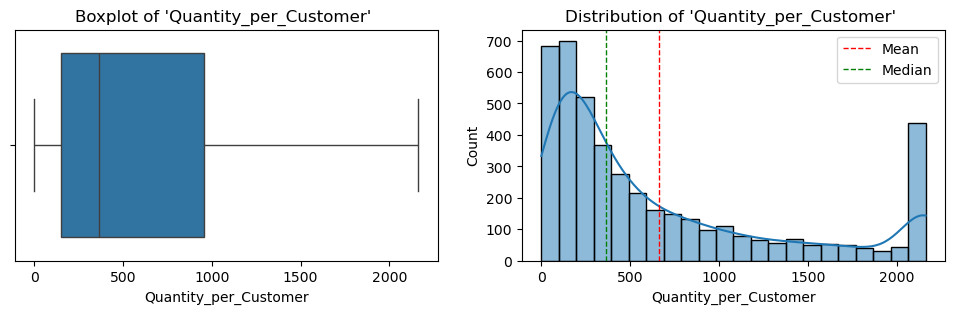

In [113]:
# Let's visualize the change in dustribution of 'Quantity_per_Customer'
plot_box_histogram(Customer_Profile['Quantity_per_Customer'])

### **5.4** : Analysis of **`Avg_Item_Price`** column
_Avg_Item_Price : Average price of items purchased by the Customer_

In [115]:
# Checking IRQ limits of 'Avg_Item_Price' using function.
IQR_Limits(Customer_Profile['Avg_Item_Price'])

IQR Value is: 1.673467489759768 
IQR Lower Limit is: -0.2847204767011724 
IQR Upper Limit is: 6.4091494823379


In [116]:
# Now, Capping all the highest values to the IQR Upper Limit
Customer_Profile.loc[Customer_Profile['Avg_Item_Price'] > 6.4092 , ['Avg_Item_Price'] ] = 6.4092

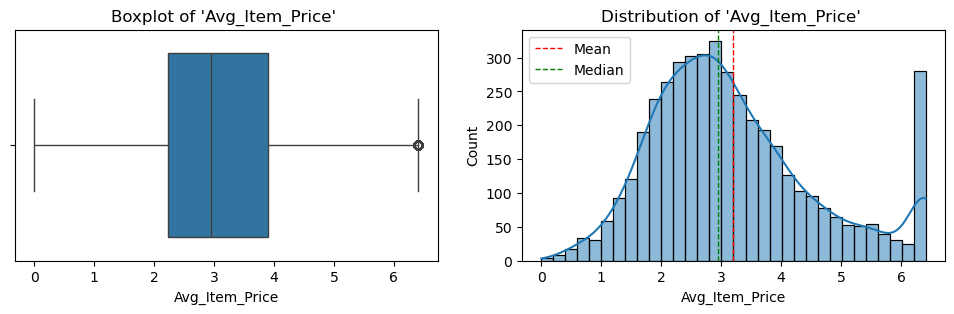

In [117]:
# Let's visualize the change in dustribution of 'Avg_Item_Price'
plot_box_histogram(Customer_Profile['Avg_Item_Price'])

### **5.5** : Analysis of **`Order_Cancellations`** column
_Order_Cancellations : Total number of orders cancelled by each customer_

In [119]:
# Checking IRQ limits of 'Order_Cancellations' using function.
IQR_Limits(Customer_Profile['Order_Cancellations'])

IQR Value is: 1.0 
IQR Lower Limit is: -1.5 
IQR Upper Limit is: 2.5


In [120]:
# Now, Capping all the highest values to the IQR Upper Limit
Customer_Profile.loc[Customer_Profile['Order_Cancellations'] > 2.5 , ['Order_Cancellations'] ] = 2.5

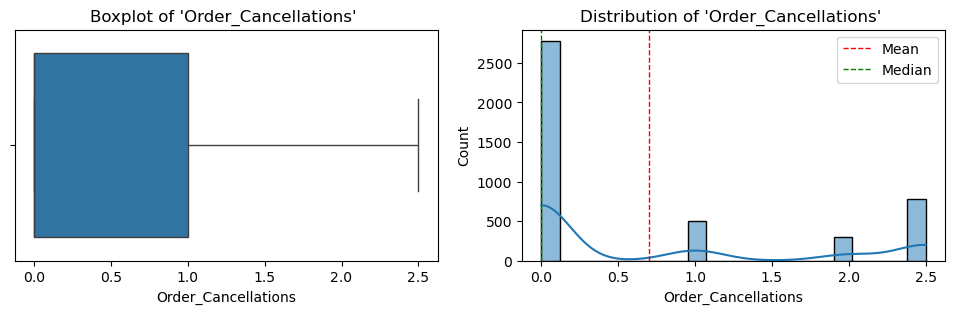

In [121]:
# Let's visualize the change in dustribution of 'Order_Cancellations'
plot_box_histogram(Customer_Profile['Order_Cancellations'])

### **5.6** : Analysis of **`Days_As_Customer`** column
_Days_As_Customer : Number of days between first and last order placed by the customer_

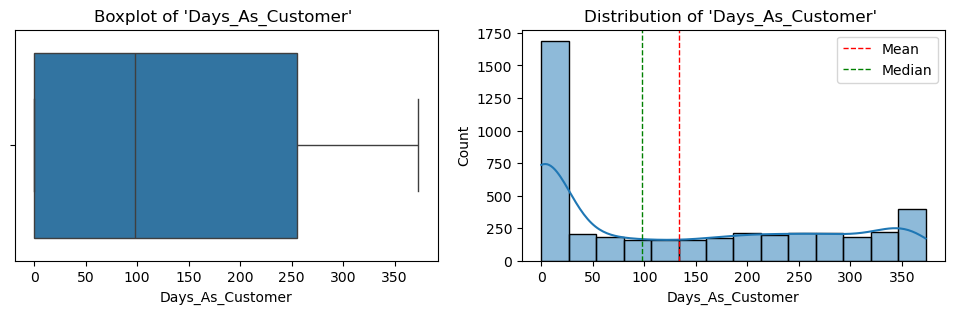

In [123]:
# Let's visualize the change in dustribution of 'Days_As_Customer'
plot_box_histogram(Customer_Profile['Days_As_Customer'])

>**Insight,**
>- **_From above charts and Quantile Plot of **`Days_As_Customer`** Column, we can say that their are No visual Outliers._**

### **5.7** : Analysis of **`Recency`** column
_Recency : Number of days since customer’s last order._

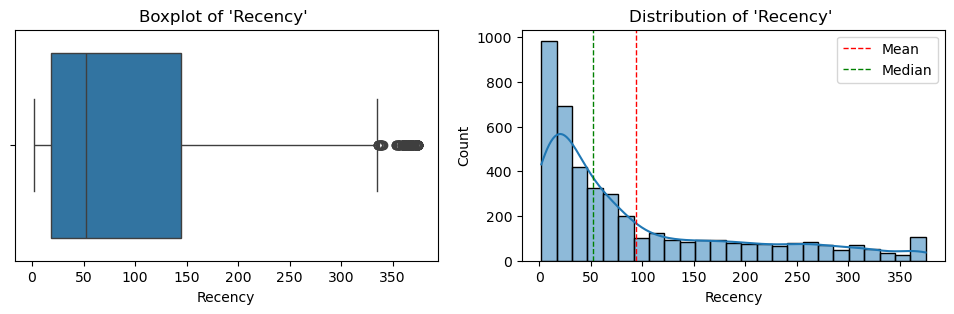

In [126]:
# Let's visualize the change in dustribution of 'Order_Cancellations'
plot_box_histogram(Customer_Profile['Recency'])

>**Insight,**
>- **_From above charts and Quantile Plot of **`Recency`** Column, we can say that their are No visual Outliers._**

In [128]:
# Now Lets Check Descriptive Statistical Summary of our dataset
Customer_Profile.describe()

Frequency     Monetary  Quantity_per_Customer  Avg_Item_Price  \
count  4372.000000  4372.000000            4372.000000     4372.000000   
mean     68.894671  1116.609651             661.368481        3.201318   
std      68.375966  1113.157203             679.090365        1.378456   
min       1.000000     0.000000               0.000000        0.000000   
25%      17.000000   291.795000             151.750000        2.225481   
50%      41.000000   644.070000             364.000000        2.947169   
75%      99.250000  1608.335000             956.250000        3.898948   
max     222.625000  3583.145000            2163.000000        6.409200   

       Order_Cancellations  Days_As_Customer      Recency  
count          4372.000000       4372.000000  4372.000000  
mean              0.701167        133.385865    93.581199  
std               1.009713        132.845467   100.772139  
min               0.000000          0.000000     2.000000  
25%               0.000000          0.000000    18.000000  
50%               0.000000         97.500000    52.000000  
75%               1.000000        255.250000   145.000000  
max               2.500000        373.000000   375.000000

***

<h1 style='background:#e3e3e1; color:Black'><Left><br>  06. Now, let's Visualize 'Customer_Profile' dataset using Pairplot </br></Left></h1>

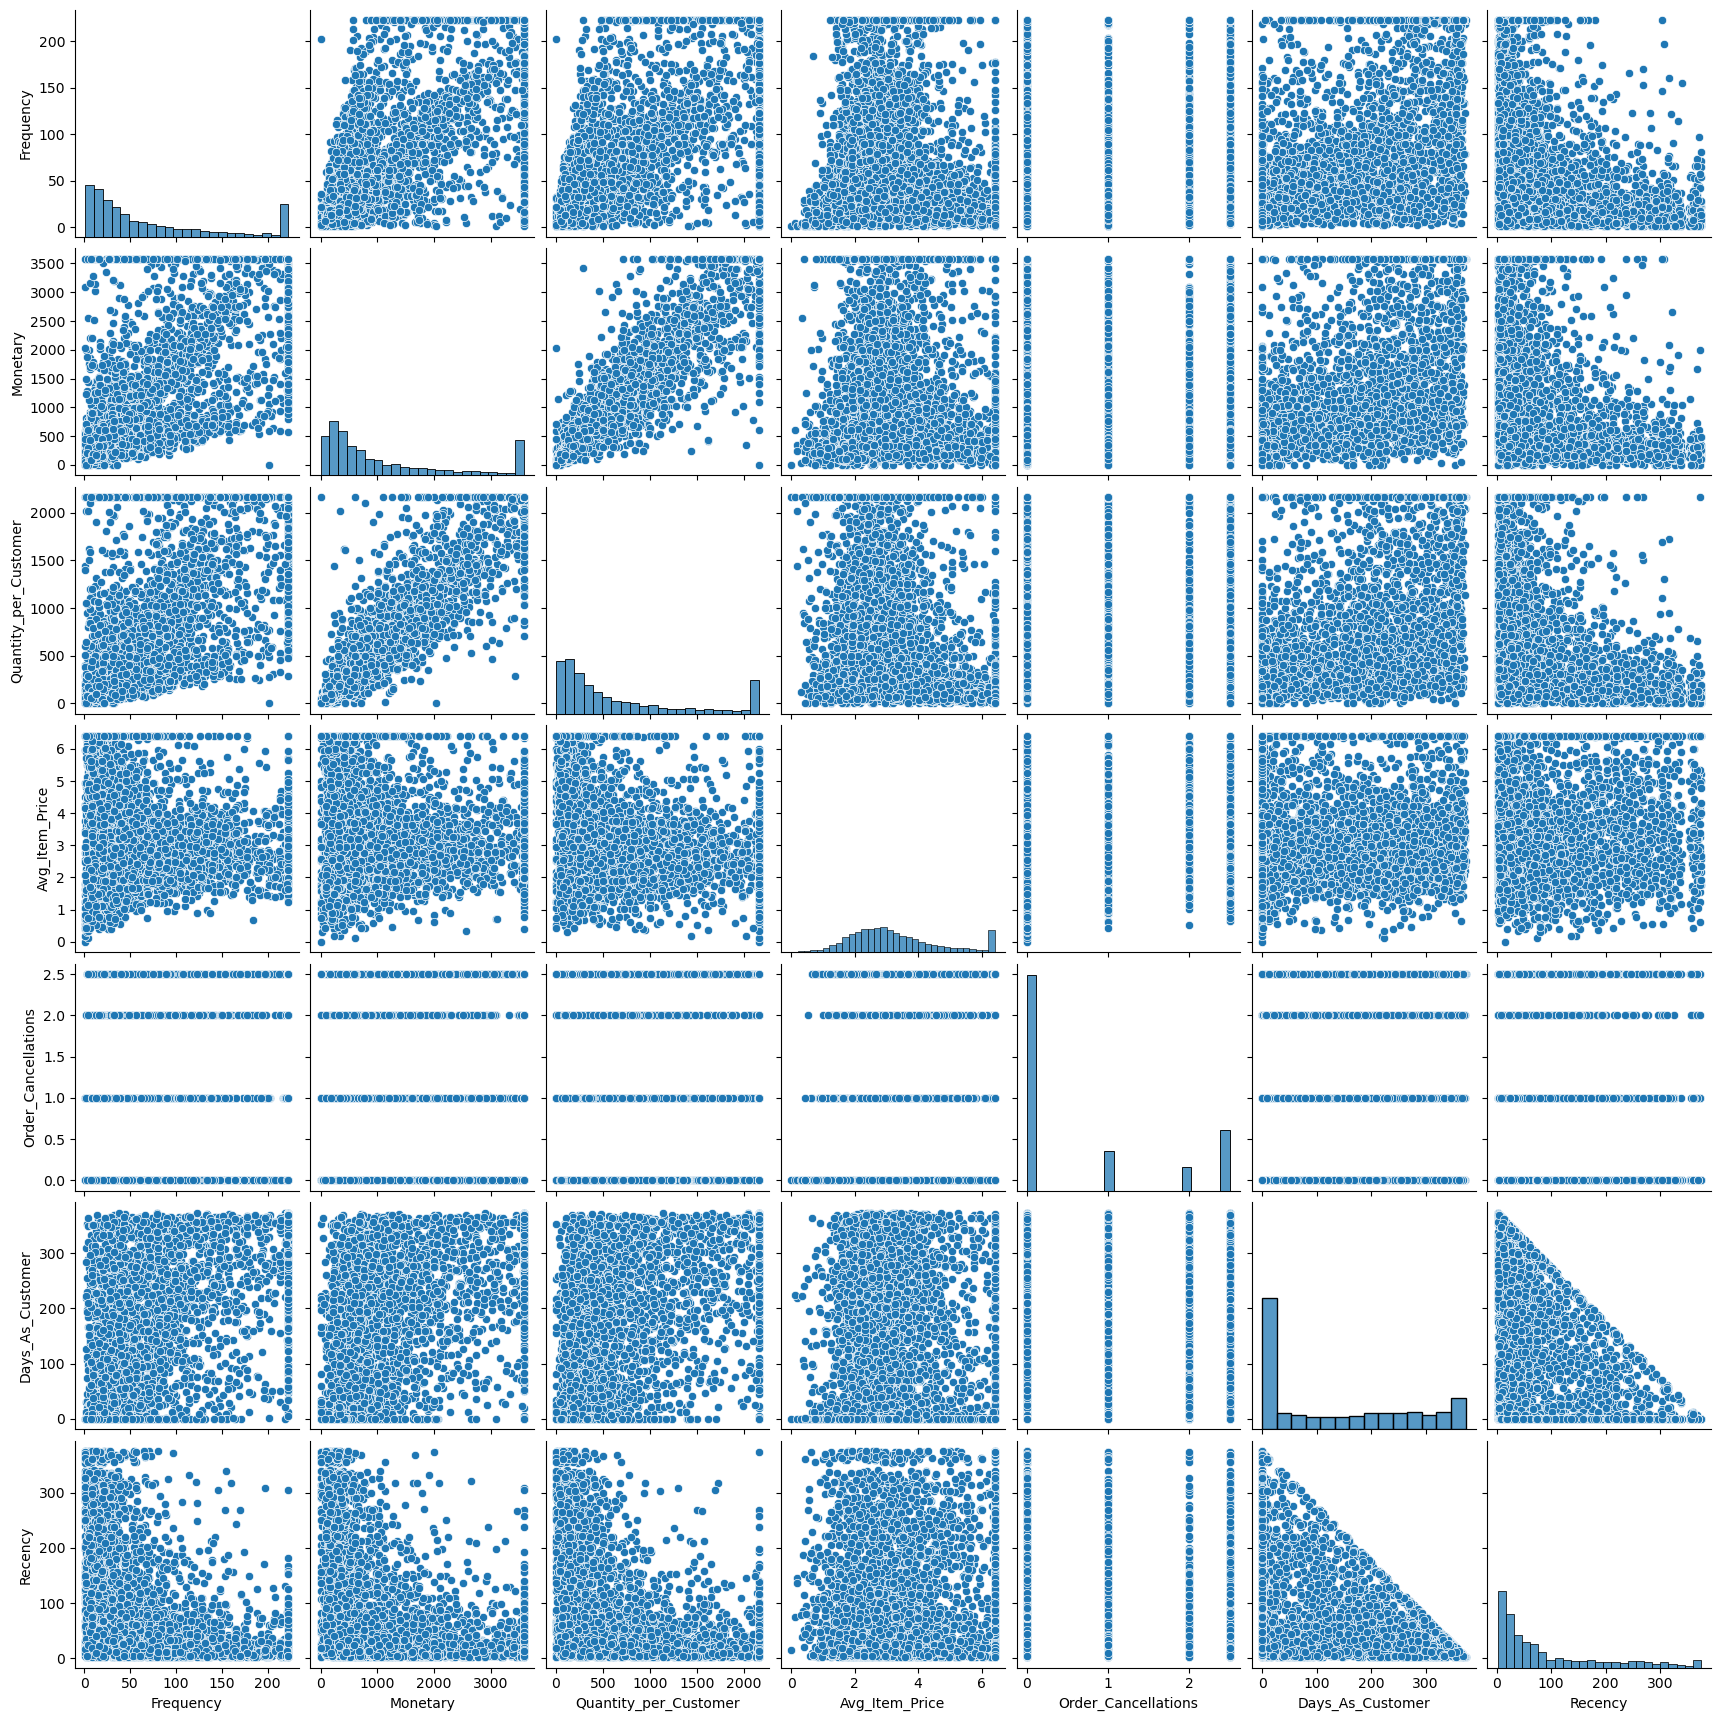

In [131]:
# Creating `Pairplot` to visualize the relation of all varaiables with eachother using scattered plot. 
sns.pairplot(Customer_Profile, kind='scatter')
plt.show()

***

<h1 style='background:#e3e3e1; color:Black'><Left><br>  07. Correlation Matrix of 'Customer Profile' </br></Left></h1>

### **7.1** Let's creating **`Correlation Matrix`** of all numeric variables of **`Customer_Profile`** Dataset

In [135]:
# Creating Correlation Matrix of all numeric variables in `Customer_Profile` Dataset
Customer_Profile[num_var].corr()

Frequency  Monetary  Quantity_per_Customer  \
Frequency               1.000000  0.782275               0.763166   
Monetary                0.782275  1.000000               0.934837   
Quantity_per_Customer   0.763166  0.934837               1.000000   
Avg_Item_Price         -0.119354 -0.008784              -0.182421   
Order_Cancellations     0.436051  0.482066               0.450881   
Days_As_Customer        0.631940  0.656250               0.625176   
Recency                -0.420520 -0.408872              -0.411270   

                       Avg_Item_Price  Order_Cancellations  Days_As_Customer  \
Frequency                   -0.119354             0.436051          0.631940   
Monetary                    -0.008784             0.482066          0.656250   
Quantity_per_Customer       -0.182421             0.450881          0.625176   
Avg_Item_Price               1.000000             0.098238         -0.017444   
Order_Cancellations          0.098238             1.000000          0.434999   
Days_As_Customer            -0.017444             0.434999          1.000000   
Recency                      0.139246            -0.218874         -0.515716   

                        Recency  
Frequency             -0.420520  
Monetary              -0.408872  
Quantity_per_Customer -0.411270  
Avg_Item_Price         0.139246  
Order_Cancellations   -0.218874  
Days_As_Customer      -0.515716  
Recency                1.000000

### **7.2** Now, let's visualize the **`Correlation Matrix`** using **`Heatmap plot`**

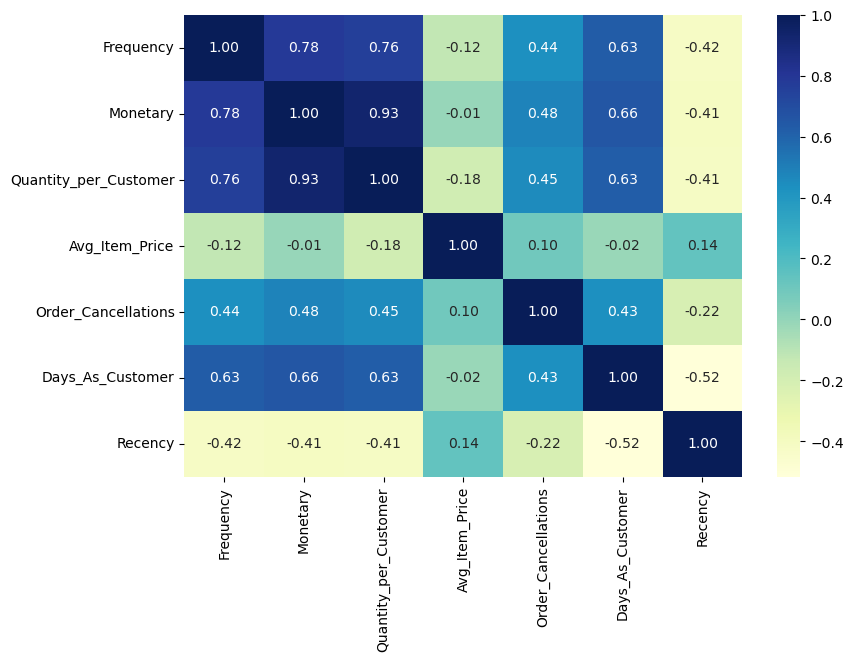

In [137]:
# Creating heatmap of correlation matrix for all numeric variables of 'Customer Profile' Dataset
plt.figure(figsize=[9,6])
sns.heatmap(Customer_Profile[num_var].corr(), cmap="YlGnBu", annot = True, fmt=".2f" )
plt.show()

***

<h1 style='background:#e3e3e1; color:Black'><Left><br>  08. Model Building </br></Left></h1>

### **8.1** : Standardize the Dataset by Feature Scaling
_Standardizing the data to ensure that each feature contributes equally to the distance calculations in K-Means, by scaling all the Features. 
>- _**Standardization:** using **`StandardScaler`** is one of the several methods of scaling data._
>- _**In Standardization, The Mean of each feature becomes 0 and the Standard Deviation becomes 1.**_

In [213]:
# Firstly, let's create a new dataframe to store our Scaled Dataset.
Customer_Profile_scaled = pd.DataFrame(Customer_Profile[num_var])
Customer_Profile_scaled.head()

Frequency  Monetary  Quantity_per_Customer  Avg_Item_Price  \
CustomerID                                                               
12346.0           2.0     0.000                      0        1.040000   
12347.0         182.0  3583.145                   2163        2.644011   
12348.0          31.0  1797.240                   2163        5.764839   
12349.0          73.0  1757.550                    631        6.409200   
12350.0          17.0   334.400                    197        3.841176   

            Order_Cancellations  Days_As_Customer  Recency  
CustomerID                                                  
12346.0                     1.0                 0      327  
12347.0                     0.0               365        4  
12348.0                     0.0               282       77  
12349.0                     0.0                 0       20  
12350.0                     0.0                 0      312

#### **8.1.1** : _Importing StandardScaler Library and fit_transforming our dataset._

In [215]:
# Importing StandardScaler from sklearn.preprocessing to standardize the features.
from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler object
scaler = StandardScaler()

# Now, Fitting the scaler to our dataset and Transforming the data into new Variable.
Customer_Profile_scaled[num_var] = scaler.fit_transform(Customer_Profile[num_var])

#### **8.1.2** : _Now, let's check the Descriptive Statistical Summary of our Scaled Dataset_

In [217]:
# Checking the Descriptive statistical summary of our Scaled Dataset
Customer_Profile_scaled.describe()

Frequency      Monetary  Quantity_per_Customer  Avg_Item_Price  \
count  4.372000e+03  4.372000e+03           4.372000e+03    4.372000e+03   
mean   2.844121e-17  6.500848e-17          -3.900509e-17    1.950255e-17   
std    1.000114e+00  1.000114e+00           1.000114e+00    1.000114e+00   
min   -9.930746e-01 -1.003216e+00          -9.740149e-01   -2.322660e+00   
25%   -7.590475e-01 -7.410535e-01          -7.505286e-01   -7.080015e-01   
50%   -4.080068e-01 -4.245525e-01          -4.379424e-01   -1.843936e-01   
75%    4.439981e-01  4.417899e-01           4.342798e-01    5.061532e-01   
max    2.248567e+00  2.216055e+00           2.211493e+00    2.327422e+00   

       Order_Cancellations  Days_As_Customer       Recency  
count         4.372000e+03      4.372000e+03  4.372000e+03  
mean         -5.850764e-17      6.825891e-17 -4.956897e-17  
std           1.000114e+00      1.000114e+00  1.000114e+00  
min          -6.945010e-01     -1.004183e+00 -9.088988e-01  
25%          -6.945010e-01     -1.004183e+00 -7.501066e-01  
50%          -6.945010e-01     -2.701633e-01 -4.126731e-01  
75%           2.959927e-01      9.174425e-01  5.103066e-01  
max           1.781733e+00      1.803912e+00  2.792944e+00

#### **8.1.3** : _Let's check the Mean and Standard Deviation of scaled dataset._

In [219]:
Customer_Profile_scaled.describe().loc[['mean', 'std'], :]

Frequency      Monetary  Quantity_per_Customer  Avg_Item_Price  \
mean  2.844121e-17  6.500848e-17          -3.900509e-17    1.950255e-17   
std   1.000114e+00  1.000114e+00           1.000114e+00    1.000114e+00   

      Order_Cancellations  Days_As_Customer       Recency  
mean        -5.850764e-17      6.825891e-17 -4.956897e-17  
std          1.000114e+00      1.000114e+00  1.000114e+00

**Insight,**
>- **_By using Standardization scaling method, we can see that the Standard Deviation of all the variables in our dataset has becomes 1 and the Mean of each feature has becomes 0._**

### **8.2** : Determining the Optimal Number of Clusters 
##### _i.e. Determining Value of K using **`The Elbow Method`**_

>- First step of the **`K-Means Clustering algorithm`** is deciding the number of clusters we want, to divided our Dataset into. 
>- There are several methods that help us in deciding which "k" values is most suited to the dataset.
>- One method that determines an appropriate "k" value, is the "Elbow Method". The elbow method works by running k-means clustering for a range of values of "k" (from 1 to 10), and for each value of "k", it calculates the Within-Cluster Sum of Squares (WCSS).
>- The method then plots WCSS's for each value of "k", from the plot we can select the smallest value of "k" that still has a small WCSS.

#### **8.2.1** : _Importing required libraries for Clustering_

In [221]:
# Importing required libraries
from sklearn import cluster, metrics
from sklearn.cluster import KMeans

#### **8.2.2** : _Using Elbow Method finding the Within-Cluster Sum of Squares (WCSS)_

In [227]:
# Using Elbow Method find the within-cluster sum of squares (WCSS)

# Defining our Scaled Dataset, to run in the loop 
X = Customer_Profile_scaled

# creating empty list to store within-cluster sum of squares (WCSS) for different values of K
WCSS = []

# Starting for loop runs on range between 1 and 11
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=10)    # set up K-means for each K between 1 and 11
    kmeans.fit(X)                 # fit K-means on our dataset
    WCSS.append(kmeans.inertia_)  # append WCSS values into empty list

#Checking vaulues in WCSS
print(WCSS)

[30604.0, 18243.284534529867, 14882.576160692746, 12788.19060669087, 11323.935604024722, 10046.36400156135, 9119.402814687326, 8545.189024857658, 8086.620180542819, 7684.228639171156]


#### **8.2.3** : _Now, Let's plot the WCSS against the number of clusters and look for the "elbow point" where the WCSS starts to decrease more slowly._

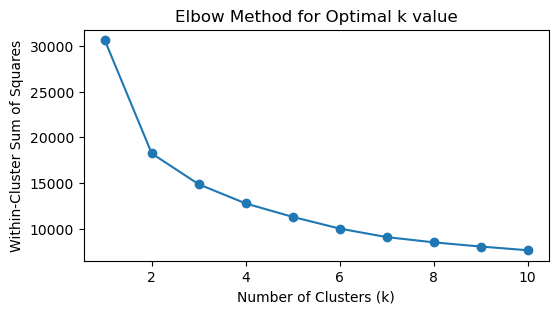

In [233]:
# Now Visualizing 'Elbow Curve' to determine the optimal number of clusters.
plt.figure(figsize=[6, 3])
plt.plot(range(1, 11), WCSS, marker='o')
plt.title('Elbow Method for Optimal k value')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

>**Insight,**
>- On visual inspection, we can see there is a significant drop from **k=1** to **k=2** (from 30604.0 to 18243.28).
>- The drop from **k=2** to **k=3** is still substantial but less steep (from 18243.28 to 14882.58).
>- From **k=3** to **k=4**, the decrease slows down (14882.58 to 12788.19).
>- After **k=4**, the rate of decline becomes even more gradual.
>- Thus we can conclude, **The most significant drop in WCSS occurs before k=3**, indicating that 3-clusters capture most of the variation in the data.
>
##### **_Optimal K value = 3 , appears to be the optimal choice based on the Elbow Method._**

In [235]:
# Based on the Elbow method, setting the optimal K value as 3
optimal_k = 3

### **8.3** : Creating K-mean Model using Optimal K value

In [237]:
# Creating K-means model
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=10)
kmeans

KMeans(n_clusters=3, n_init=10, random_state=10)

### **8.4** : Applying K-Mean Clustering Model on scaled dataset & storing clusters in new column **`Pred_cluster`**

In [239]:
# Apply K-means clustering on Scaled Dataset
Customer_Profile_scaled['Pred_cluster'] = kmeans.fit_predict(X)

# Checking head of dataset
Customer_Profile_scaled.head()

Frequency  Monetary  Quantity_per_Customer  Avg_Item_Price  \
CustomerID                                                               
12346.0     -0.978448 -1.003216              -0.974015       -1.568106   
12347.0      1.654357  2.216055               2.211493       -0.404344   
12348.0     -0.554274  0.611511               2.211493        1.859917   
12349.0      0.060047  0.575852              -0.044724        2.327422   
12350.0     -0.759048 -0.702775              -0.683888        0.464238   

            Order_Cancellations  Days_As_Customer   Recency  Pred_cluster  
CustomerID                                                                 
12346.0                0.295993         -1.004183  2.316568             0  
12347.0               -0.694501          1.743685 -0.889050             1  
12348.0               -0.694501          1.118827 -0.164560             1  
12349.0               -0.694501         -1.004183 -0.730258             2  
12350.0               -0.694501         -1.004183  2.167700             0

#### **8.4.1** : _Let's check the Total Count of Customers in each Cluster_

In [255]:
# Checking the Value counts of each Clusters
Customer_Profile_scaled['Pred_cluster'].value_counts()

Pred_cluster
2    2229
1    1107
0    1036
Name: count, dtype: int64

In [257]:
# Let's check percentage of Customers in each Clusters
Customer_Profile_scaled['Pred_cluster'].value_counts()/len(Customer_Profile_scaled)*100

Pred_cluster
2    50.983532
1    25.320220
0    23.696249
Name: count, dtype: float64

>**Insight,**
>- **_By applying, K-Means Clustering with K=3, we have got Total 3 Clusters i.e. Cluster-0, Cluster-1, and Cluster-2._**
>- **_Cluster-2, has the Highest number of Customers, around 50.98%._**
>- **_Cluster-1, has the Second Highest number of Customers, i.e. around 25.32%._**
>- **_Cluster-0, has the Lowest number of Customers, i.e. around 23.69% only._**

#### **8.4.2** : Now, let's Visualize the Clusters in 3D geometry on the basis of RFM (Recency, Frequency, and Monetary value)

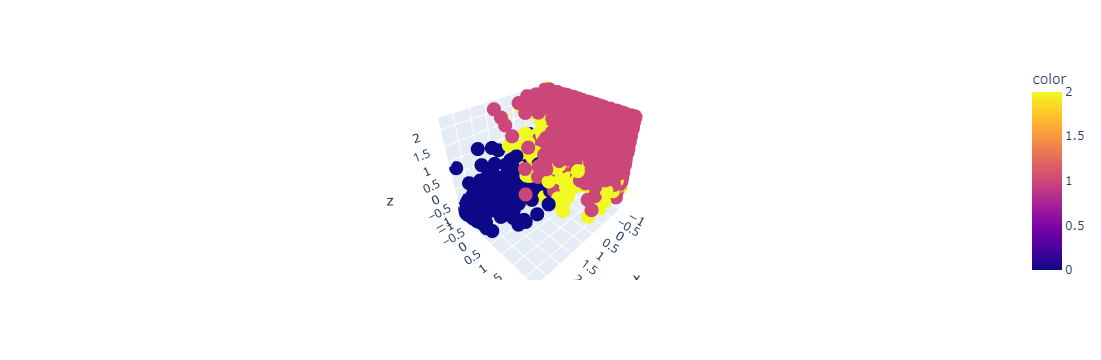

In [264]:
# Visualizing the Clusters in 3D geometry on the basis of RFM (Recency, Frequency, and Monetary value)

import plotly.express as px
fig = px.scatter_3d( x=Customer_Profile_scaled['Recency'], y=Customer_Profile_scaled['Frequency'], 
                     z=Customer_Profile_scaled['Monetary'] ,color=Customer_Profile_scaled['Pred_cluster'] )
fig.show()

<div class="alert alert-block alert-warning">
<b> 
Checking Model Accuracy
</b>
</div>

<div class="alert alert-block alert-warning">
kmeans.inertia_
</div>

labels = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, labels.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(labels.size)))

from sklearn.metrics import silhouette_score
# Define the range of K values to explore
k_values = range(2, 25)
silhouette_scores = []

best_k = None
best_silhouette_score = -1

# Iterate through different K values
for k in k_values:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    km.fit(X)
    
    # Calculate the average silhouette score
    silhouette_avg = silhouette_score(X, km.labels_)  
    silhouette_scores.append(silhouette_avg)
    
    # Update the best K value if a higher silhouette score is found
    if silhouette_avg > best_silhouette_score:
        best_k = k
        best_silhouette_score = silhouette_avg

# Output the best K value and corresponding Silhouette Score
print("Best K value:", best_k)
print("Best Silhouette Score:", best_silhouette_score)


# Create a plot to visualize Silhouette Scores
plt.plot(k_values, silhouette_scores)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()

<div class="alert alert-block alert-warning">
</div>

### **8.5** : Now, Let's assign these Cluster Labels to our **`Customer_Profile`** dataset

In [266]:
# Firstly, lets reset_index and Checking head of our scaled Dataset
Customer_Profile_scaled = Customer_Profile_scaled.reset_index()
Customer_Profile_scaled.head()

CustomerID  Frequency  Monetary  Quantity_per_Customer  Avg_Item_Price  \
0     12346.0  -0.978448 -1.003216              -0.974015       -1.568106   
1     12347.0   1.654357  2.216055               2.211493       -0.404344   
2     12348.0  -0.554274  0.611511               2.211493        1.859917   
3     12349.0   0.060047  0.575852              -0.044724        2.327422   
4     12350.0  -0.759048 -0.702775              -0.683888        0.464238   

   Order_Cancellations  Days_As_Customer   Recency  Pred_cluster  
0             0.295993         -1.004183  2.316568             0  
1            -0.694501          1.743685 -0.889050             1  
2            -0.694501          1.118827 -0.164560             1  
3            -0.694501         -1.004183 -0.730258             2  
4            -0.694501         -1.004183  2.167700             0

In [268]:
# Now, Let's merge Scaled Dataset to our Original Dataset to add Cluster Labels.
Customer_Profile = pd.merge(Customer_Profile, Customer_Profile_scaled[['CustomerID', 'Pred_cluster']], on='CustomerID', how='left')
Customer_Profile.head() 

CustomerID  Frequency  Monetary  Quantity_per_Customer  Avg_Item_Price  \
0     12346.0        2.0     0.000                      0        1.040000   
1     12347.0      182.0  3583.145                   2163        2.644011   
2     12348.0       31.0  1797.240                   2163        5.764839   
3     12349.0       73.0  1757.550                    631        6.409200   
4     12350.0       17.0   334.400                    197        3.841176   

   Order_Cancellations         Country Continent  Days_As_Customer  Recency  \
0                  1.0  UNITED KINGDOM    Europe                 0      327   
1                  0.0         ICELAND    Europe               365        4   
2                  0.0         FINLAND    Europe               282       77   
3                  0.0           ITALY    Europe                 0       20   
4                  0.0          NORWAY    Europe                 0      312   

   Pred_cluster  
0             0  
1             1  
2             1  
3             2  
4             0

***

<h1 style='background:#e3e3e1; color:Black'><Left><br>  09. Cluster Analysis </br></Left></h1>

### **9.1** : Now, let's group the data by clusters and understanding the characteristics of all the key variables for each cluster.

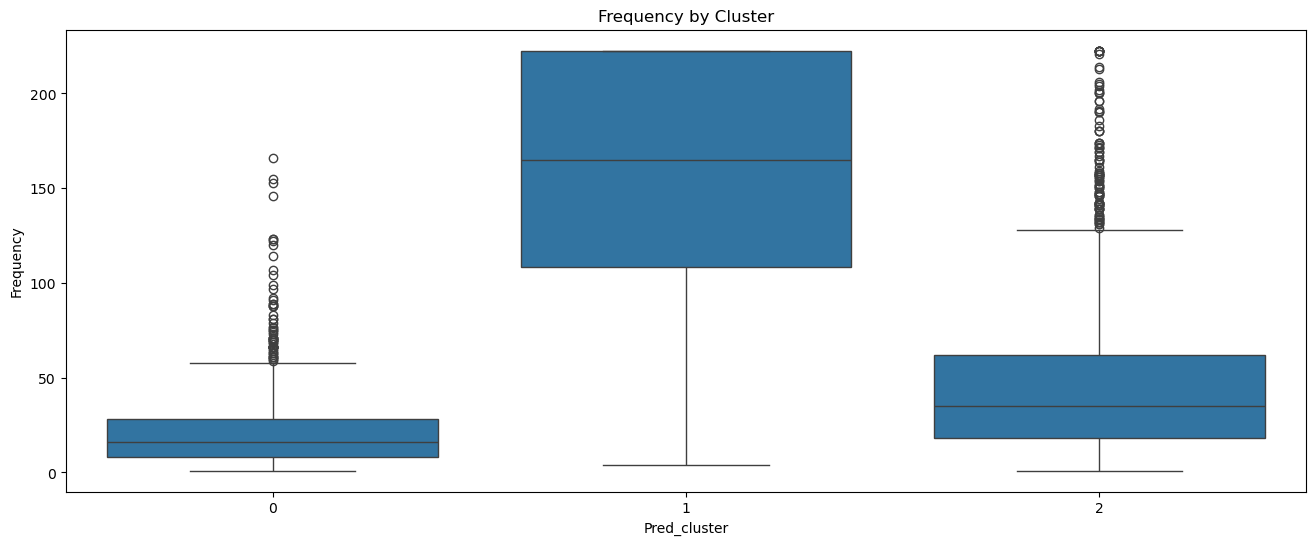

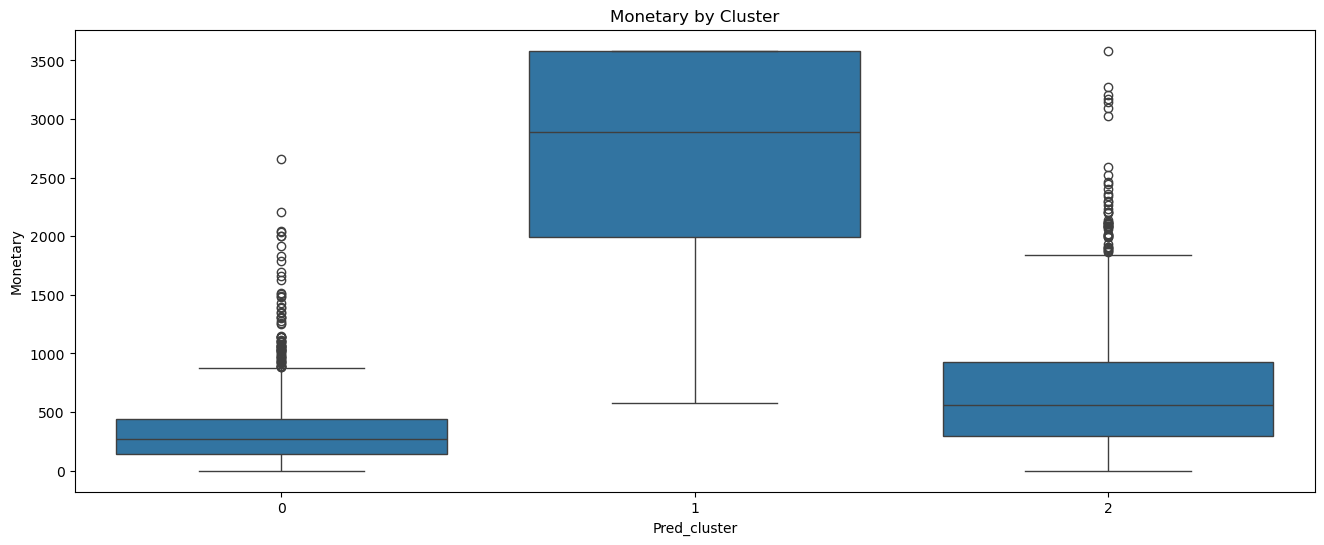

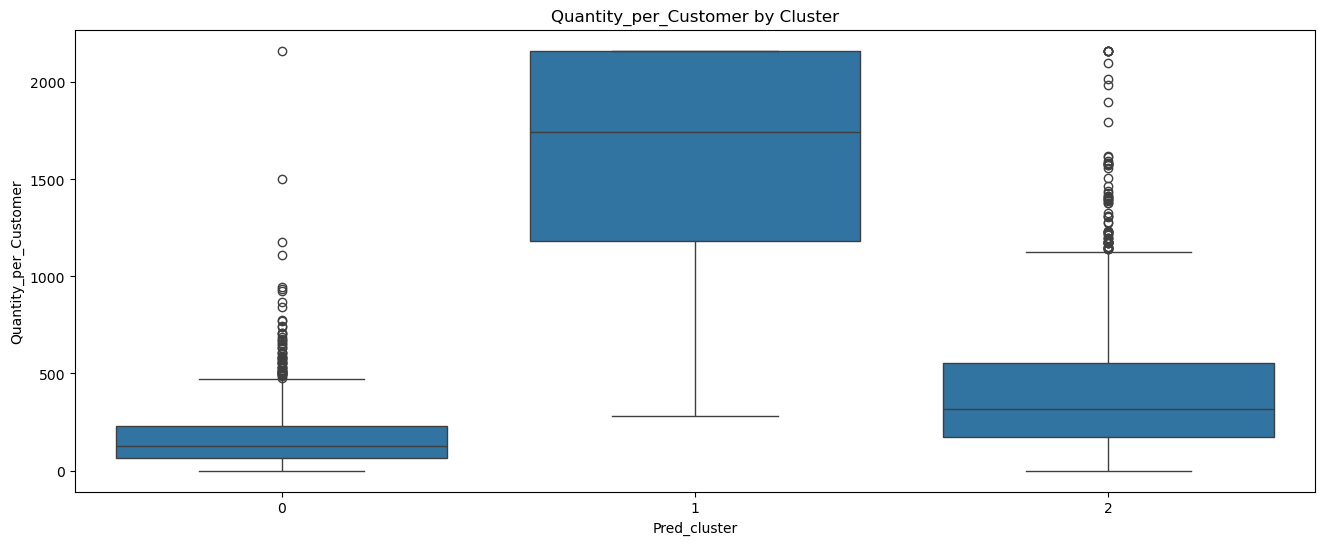

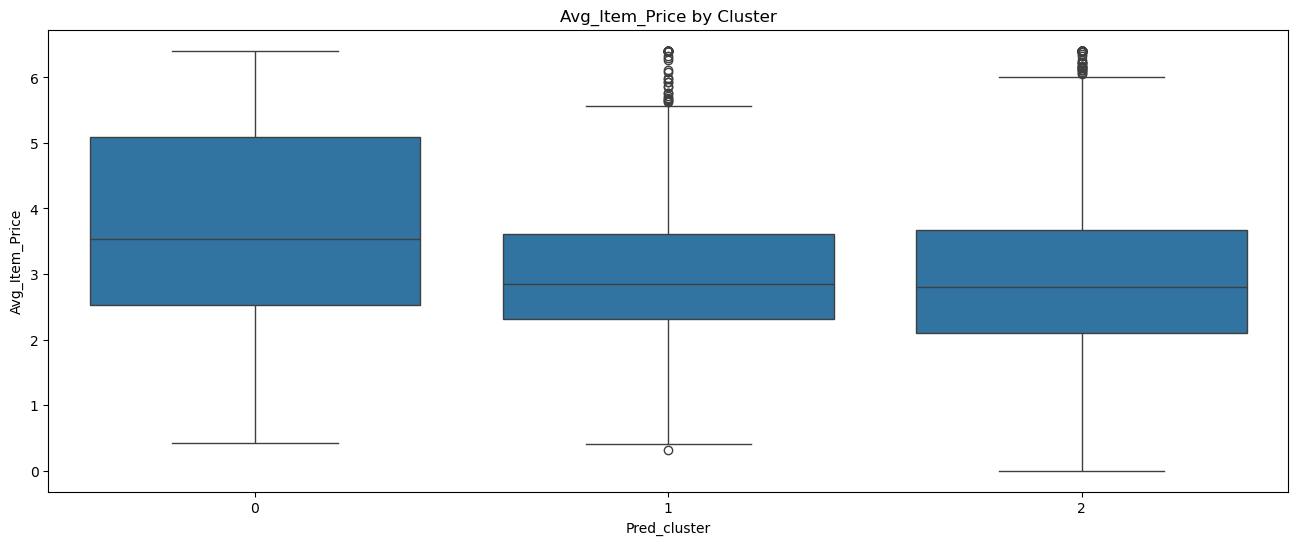

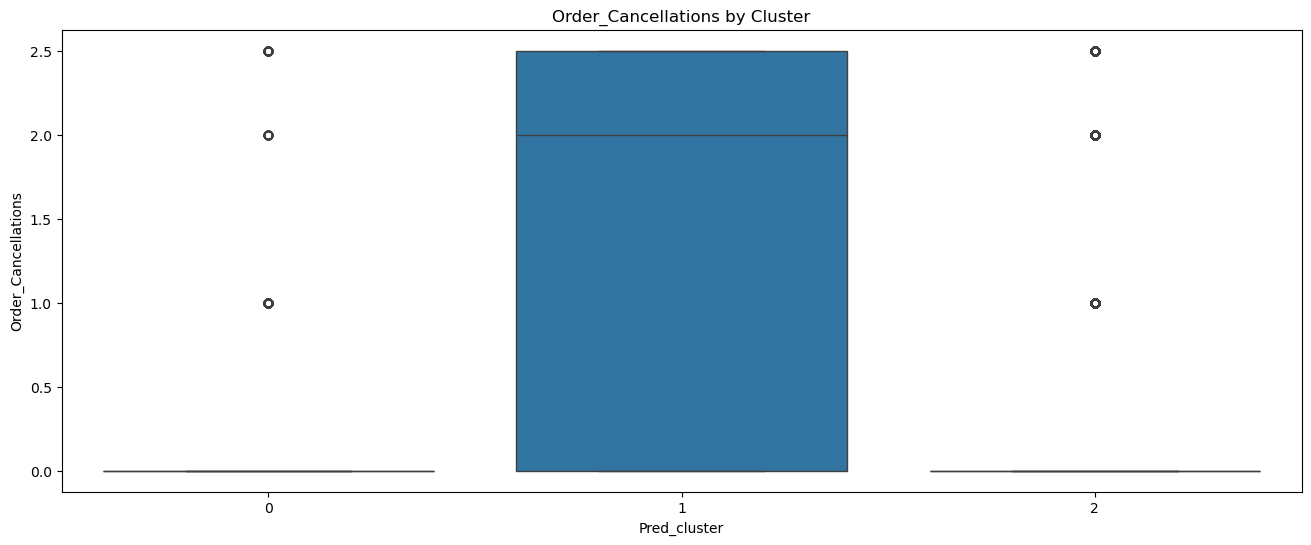

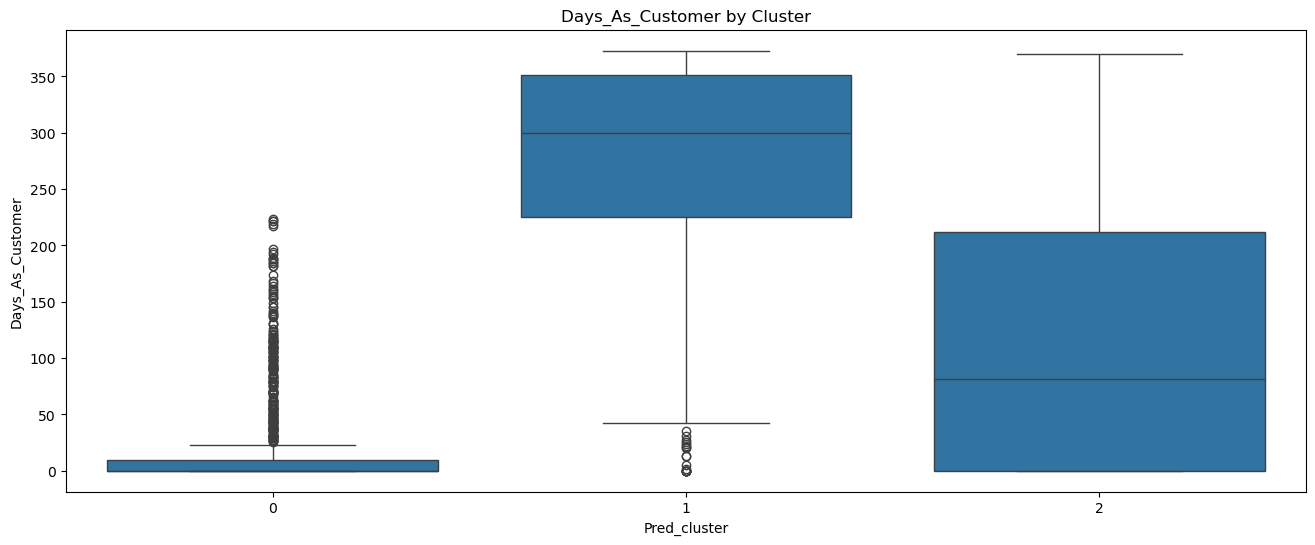

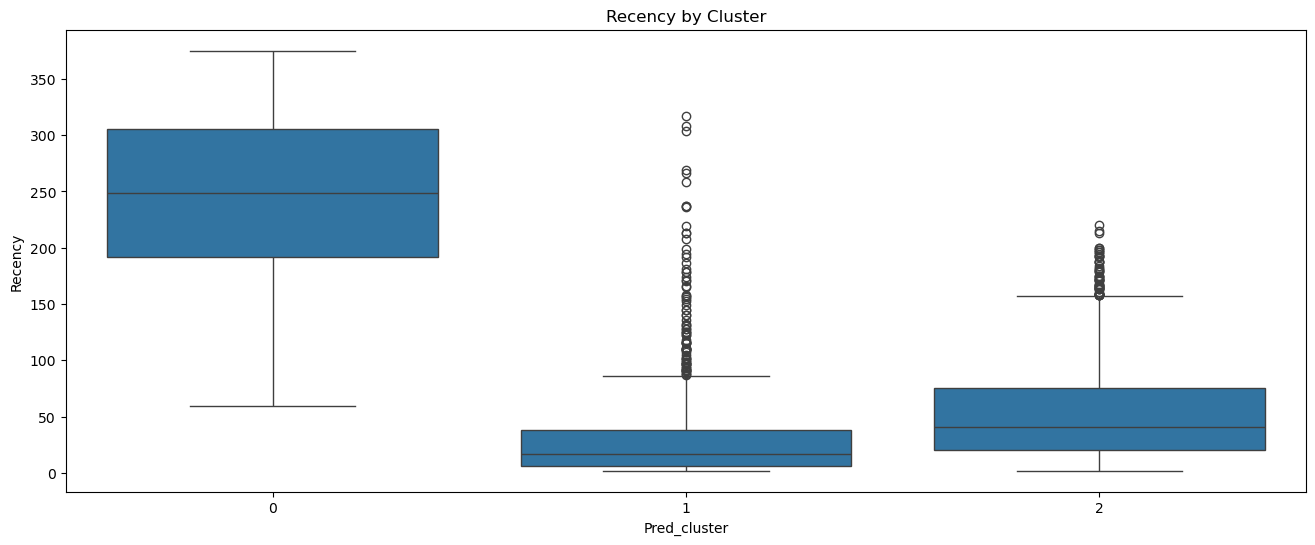

In [273]:
# Visualizing using box plots to understand the distribution of data across each clusters
for col in num_var:
    plt.figure(figsize=(16, 6))
    sns.boxplot(x='Pred_cluster', y=col, data=Customer_Profile)
    plt.title(f'{col} by Cluster')
    plt.show()
    print(f'\n')

### **9.2** : Calculating the **`Mean`** of all the key variables for each cluster

In [338]:
#  Now, grouping Customer profile by Cluster and calculating the `Mean` of all key variables
Customer_Profile.groupby('Pred_cluster').mean()

CustomerID   Frequency     Monetary  Quantity_per_Customer  \
Pred_cluster                                                                 
0             15321.814672   21.444981   348.107481             173.364865   
1             15143.053297  159.143180  2744.930231            1636.157182   
2             15367.174069   46.127860   665.114526             404.069538   

              Avg_Item_Price  Order_Cancellations  Days_As_Customer  \
Pred_cluster                                                          
0                   3.783452             0.350386         19.466216   
1                   3.071393             1.575881        275.748871   
2                   2.995278             0.429789        115.631225   

                 Recency  
Pred_cluster              
0             248.558880  
1              31.279133  
2              52.491700

### **9.3** : Calculating the **`Median`** of all the key variables for each cluster

In [341]:
#  Now, grouping Customer profile by Cluster and calculating the `Median` of all key variables
Customer_Profile.groupby('Pred_cluster').median()

CustomerID  Frequency  Monetary  Quantity_per_Customer  \
Pred_cluster                                                           
0                15315.0       16.0   266.125                  125.0   
1                15039.0      165.0  2888.750                 1745.0   
2                15432.0       35.0   562.680                  316.0   

              Avg_Item_Price  Order_Cancellations  Days_As_Customer  Recency  
Pred_cluster                                                                  
0                   3.537237                  0.0               0.0    248.5  
1                   2.853034                  2.0             300.0     17.0  
2                   2.807969                  0.0              81.0     41.0

### **9.4** : Calculating the **`Standard Deviation`** of all the key variables for each cluster

In [345]:
#  Now, grouping Customer profile by Cluster and calculating the `Standard Deviation` of all key variables
Customer_Profile.groupby('Pred_cluster').std()

CustomerID  Frequency    Monetary  Quantity_per_Customer  \
Pred_cluster                                                              
0             1714.122455  21.074926  319.792275             175.571916   
1             1764.192507  60.815567  842.758127             529.283181   
2             1700.931703  38.956178  484.708313             319.780335   

              Avg_Item_Price  Order_Cancellations  Days_As_Customer    Recency  
Pred_cluster                                                                    
0                   1.632049             0.747175         41.876790  73.555089  
1                   1.145848             1.063374         88.116191  40.949808  
2                   1.276808             0.817576        116.334592  42.320108

### **9.5** : Creating new dataframe **`Cluster_summary`** to storing these Statistical Summary

In [366]:
#  Now, grouping Customer profile by Cluster and performing aggeration ['Mean', 'Median' and `Standard Deviation`] on all key variables.

Cluster_summary = Customer_Profile.groupby('Pred_cluster').agg({'Frequency'            : ['mean','median','std'],
                                                                'Monetary'             : ['mean','median','std'],
                                                                'Quantity_per_Customer': ['mean','median','std'],
                                                                'Avg_Item_Price'       : ['mean','median','std'],
                                                                'Order_Cancellations'  : ['mean','median','std'],
                                                                'Days_As_Customer'     : ['mean','median','std'],
                                                                'Recency'              : ['mean','median','std']
                                                               }).reset_index()

In [402]:
# Let's check all the Cluster Statistical Summary.

Cluster_summary

Pred_cluster   Frequency                       Monetary            \
                      mean median        std         mean    median   
0            0   21.444981   16.0  21.074926   348.107481   266.125   
1            1  159.143180  165.0  60.815567  2744.930231  2888.750   
2            2   46.127860   35.0  38.956178   665.114526   562.680   

              Quantity_per_Customer                      ... Avg_Item_Price  \
          std                  mean  median         std  ...            std   
0  319.792275            173.364865   125.0  175.571916  ...       1.632049   
1  842.758127           1636.157182  1745.0  529.283181  ...       1.145848   
2  484.708313            404.069538   316.0  319.780335  ...       1.276808   

  Order_Cancellations                  Days_As_Customer                     \
                 mean median       std             mean median         std   
0            0.350386    0.0  0.747175        19.466216    0.0   41.876790   
1            1.575881    2.0  1.063374       275.748871  300.0   88.116191   
2            0.429789    0.0  0.817576       115.631225   81.0  116.334592   

      Recency                    
         mean median        std  
0  248.558880  248.5  73.555089  
1   31.279133   17.0  40.949808  
2   52.491700   41.0  42.320108  

[3 rows x 22 columns]

### **9.6** : Insights based on Cluster Analysis
_Based on our cluster analysis we can conclude the following:_

<div class="alert alert-block alert-success">

**Cluster-0 : _Low Engagement, Low Spending Customers_**  
>- **`Frequency`**: Customers in this segment make around 21 purchases on average, with a median of 16.
>- **`Monetary`**: Their average spending is moderate at 348, with a median of 266.
>- **`Quantity`**: These customers buy fewer items per order when compared to other segments, with an average quantity of 173.
>- **`Avg_Item_Price`**: They tend to buy items priced higher than other clusters ($3.78 on average).
>- **`Order Cancellations`**: Very low cancellation rate (0.35 on average), and a median of 0 cancellations.
>- **`Days_as_Customer`**: These are relatively new customers with an average tenure of 19 days.
>- **`Recency`**: High recency (248 days on average), indicating that they haven't made a purchase recently.

**_Key Characteristics :_**
>- _These customers have low engagement with the platform and low spending._
>- _They are relatively new, with low loyalty and low likelihood of repeat purchases._
>- _Their purchasing behavior suggests they might be occasional shoppers looking for specific items._

</div> 

<div class="alert alert-block alert-success">
    
**Cluster-1 : _High-Value, Frequent Shoppers_**  
>- **`Frequency`**: These customers are highly engaged, making around 159 purchases on average, with a median of 165.
>- **`Monetary`**: High spenders with an average monetary value of 2745, and a median of 2888.
>- **`Quantity`**: They purchase large quantities of items, with an average of 1636 items and a median of 1745.
>- **`Avg_Item_Price`**: These customers buy slightly lower-priced items on average ($3.07).
>- **`Order Cancellations`**: Moderate cancellations (average 1.58, median 2).
>- **`Days_as_Customer`**: These are long-term customers with an average tenure of 275 days.
>- **`Recency`**: Very recent purchases (average recency of 31 days).

**_Key Characteristics :_**
>- _This is your most valuable segment, consisting of frequent, high-value customers who are very engaged with the platform._
>- _They make large purchases regularly and have been loyal customers for a long time._
>- _Their cancellation rate is moderate, indicating they are discerning buyers._

</div>

<div class="alert alert-block alert-success">

**Cluster-2 : _Moderate Engagement, Mid-Level Spending Customers_**  
>- **`Frequency`**: Moderate purchase frequency at 46 orders on average, with a median of 35.
>- **`Monetary`**: These customers spend moderately, with an average monetary value of 665 and a median of 563.
>- **`Quantity`**: They buy a moderate number of items (average 404 and median 316).
>- **`Avg_Item_Price`**: They tend to buy items priced at $2.99 on average.
>- **`Order Cancellations`**: Very low cancellation rate (0.43 on average), and a median of 0 cancellations.
>- **`Days_as_Customer`**: These customers have been with the company for an intermediate duration (average 115 days).
>- **`Recency`**: They have a moderate recency with average of 52 days.

**_Key Characteristics :_**
>- _These customers are moderately engaged, with a balanced spending and purchasing pattern._
>- _They show a mix of loyalty and price sensitivity, as they do not cancel orders often._
>- _They are likely to be occasional shoppers who return to the platform periodically._

</div>

***

<h1 style='background:#e3e3e1; color:Black'><Left><br>  10. Conclusion </br></Left></h1>

<div class="alert alert-block alert-success">

- _**Cluster-0** represents low-engagement customers who need nurturing and reactivation strategies._
- _**Cluster-1** consists of high-value, loyal customers who should be rewarded and incentivized to continue their frequent purchasing._
- _**Cluster-2** includes moderately engaged customers who are price-sensitive but show potential for increased engagement with targeted offers._

</div>

***

<h1 style='background:#e3e3e1; color:Black'><Left><br>  11. Recommendations </br></Left></h1>

**_1. Segment-Specific Marketing :_**
> Use customer segmentation to create personalized marketing campaigns. High-value customers in Cluster 1 can receive exclusive rewards, while Cluster 0 can benefit from reactivation and engagement efforts.

**_2. Loyalty and Reward Programs :_**
> Implement tiered loyalty programs that offer increasing rewards based on engagement and spending. This will encourage low-engagement customers to increase their activity and retain high-value customers.

**_3. Retention Strategies :_**
> Focus on improving customer retention across all segments by offering value-added services, such as free shipping for frequent buyers or dedicated customer support for loyal customers.

**_4. Product Recommendations :_**
> Leverage the data to create personalized product recommendations for each segment, increasing the likelihood of repeat purchases.

**_5. Feedback and Engagement :_**
> Regularly collect feedback, especially from high-value customers, to ensure the business meets their expectations. Implement changes based on this feedback to enhance customer satisfaction.

In [ ]:
Customer_Profile_RFM = Customer_Profile[["Order_per_Customer",'Total_Spending','Recency']].rename(columns={'Order_per_Customer': 'Frequency', 'Total_Spending':'Monetary'})
Customer_Profile_RFM

In [ ]:
type(Customer_Profile_RFM)

In [ ]:
# Creating heatmap of correlation matrix of 'Customer Profile'
plt.figure(figsize=[6,4])
sns.heatmap(Customer_Profile_RFM.corr(), cmap="YlGnBu", annot = True, fmt=".3f" )
plt.show()

In [ ]:
# Lets sepreate numerical and categorical variables
num_var = Customer_Profile_RFM.select_dtypes(include='number').columns

Customer_Profile_RFM_Scaled = pd.DataFrame(Customer_Profile_RFM[num_var])

In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()

# Now, Fitting the scaler to the data and Transforming the data
Customer_Profile_RFM_Scaled[num_var] = scaler.fit_transform(Customer_Profile_RFM[num_var])

In [ ]:
#Checking descriptive stats of Scaled Dataset
Customer_Profile_RFM_Scaled.describe()

In [ ]:
# ELBOW METHOD # 

# Data to run in the loop 
X = Customer_Profile_RFM_Scaled

# creating empty list to store Sum of Squared Error's (SSE's) for different K-means clustering
SSE = []

# for loop runs on range between 1 and 11
for k in range(1, 11):
    # set up K-means for each K between 1 and 11 
    kmeans = KMeans(n_clusters=k, random_state=10)
    # fit K-means in data
    kmeans.fit(X)
    # append SSE values into empty list
    SSE.append(kmeans.inertia_)

#Checking vaulues in SSE
print(SSE)

In [ ]:
# Now Visualizing Elbow Graph to determine the optimal number of clusters.
fig = plt.figure(figsize=(7, 5))
plt.plot(range(1, 11), SSE, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors')
plt.show()

In [ ]:
# Based on the Elbow method, choose the optimal K value as 7
optimal_k = 3

In [ ]:
# Creating Kmeans model 
kmeans = KMeans(n_clusters=optimal_k, random_state=10)
kmeans

In [ ]:
# Apply K-means clustering
Customer_Profile_RFM_Scaled['Pred_cluster'] = kmeans.fit_predict(X)

# Checking head of dataset
Customer_Profile_RFM_Scaled.head()

In [ ]:
Customer_Profile_RFM_Scaled['Pred_cluster'].value_counts()

In [ ]:
Customer_Profile_RFM_Scaled.describe()

In [ ]:

import plotly.express as px
fig = px.scatter_3d( x=Customer_Profile_RFM_Scaled['Monetary'], y=Customer_Profile_RFM_Scaled['Frequency'], 
                    z=Customer_Profile_RFM_Scaled['Recency'] ,color=Customer_Profile_RFM_Scaled['Pred_cluster'] )
fig.show()

In [ ]:
#Customer_Profile_RFM = pd.concat([Customer_Profile_RFM,Customer_Profile_RFM_Scaled['Pred_cluster']].reindex(columns=['Frequency','Monetary','Recency','Pred_cluster']))
#Customer_Profile_RFM.head()

u = Customer_Profile_RFM
v = Customer_Profile_RFM_Scaled
Customer_Profile_RFM = pd.concat([u, v])
Customer_Profile_RFM.head()